# Task 4: Conceptual Questions

Ques.1. What is entropy and information gain?

Ans.1.

Entropy is a measure of impurity or randomness in the dataset. In decision trees, it quantifies how mixed the classes are in a node.

Information Gain measures the reduction in entropy after a dataset is split on an attribute.

Ques.2. Explain the difference between Gini Index and Entropy?

Ans.2. 

| Aspect                |   Gini Index                                                |  Entropy                                        |
| --------------------- | ----------------------------------------------------------- | ----------------------------------------------- |
|   Meaning             | Measures impurity based on probability of misclassification | Measures impurity based on information content  |
|   Range               | 0 (pure) to 0.5 (maximum impurity in binary case)           | 0 (pure) to 1 (maximum impurity in binary case) |
|   Calculation Speed   | Faster (no logarithmic calculations)                        | Slower (uses logarithmic functions)             |
|   Algorithm Usage     | Used by CART (Classification and Regression Trees)          | Used by ID3 and C4.5 decision tree algorithms   |


Ques.3. How can a decision tree overfit? How can this be avoided?

Ans.3. 

Overfitting happens when a decision tree becomes too deep and captures noise or minor patterns in the training data.

To avoid overfitting:

 1.Use pruning (remove unnecessary branches).
 2.Set a maximum depth.
 3.Define a minimum number of samples per leaf or split.
 4.Use cross-validation to tune hyperparameters.

# Task 5: Decision Tree on Titanic Dataset

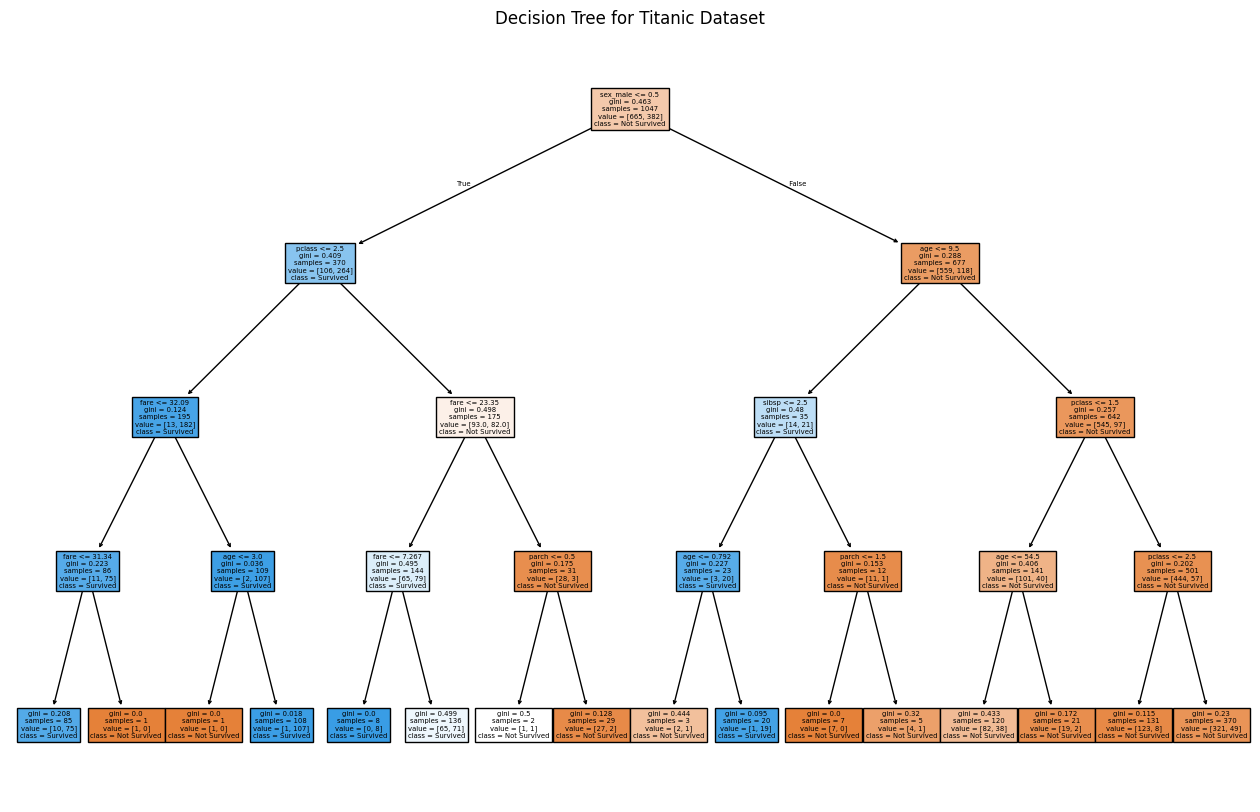

Accuracy: 0.76


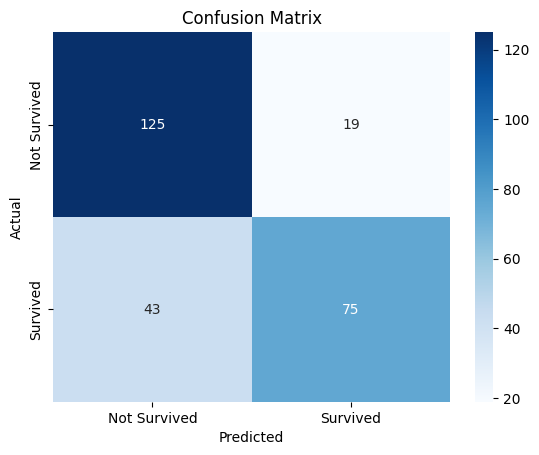

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic.frame

df = df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'])

df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

df = df.dropna(subset=['survived'])

X = df.drop(columns=['survived'])
y = df['survived'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Task 6: Model Tuning

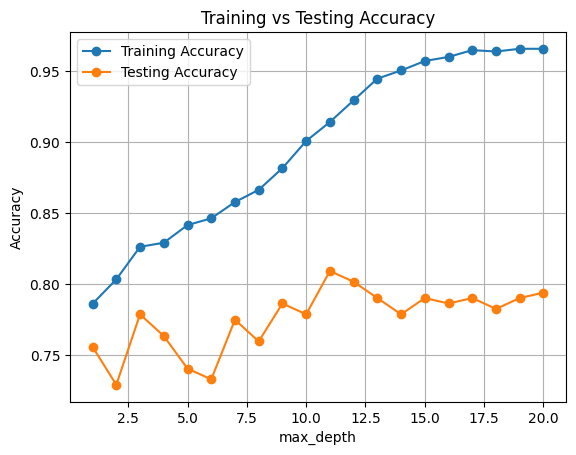

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic.frame

df = df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'])
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
df = df.dropna(subset=['survived'])

X = df.drop(columns=['survived'])
y = df['survived'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depth_range = range(1, 21)
train_acc = []
test_acc = []

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, min_samples_split=2, random_state=42)
    model.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(depth_range, train_acc, label="Training Accuracy", marker='o')
plt.plot(depth_range, test_acc, label="Testing Accuracy", marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.grid(True)
plt.show()

<div align="center">

<h2>Thank You!</h2>

</div>
